A typical time series model will exhibit any or combination of these patterns.
<br>

![Sigmoid function of LR](https://miro.medium.com/max/1400/1*V_RKPeIxCB9CS_2SsLyKXw.jpeg)


reference : https://vitalflux.com/autoregressive-ar-models-with-python-examples/

# <span style="color:yellow">**Autoregressive Model**</span>

Autoregressive model to predict future torque measurements based on previous observations

## <span style="color:yellow">**Required Libraries**</span>

In [1]:
# Packages libraries
import os # this function is used to interact with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import plotly.express as px
%matplotlib inline
from datetime import datetime
import plotly.express as px

# packages to run autoregression
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

pd.options.mode.chained_assignment = None

from pandas.plotting import autocorrelation_plot


# SQL Libraries
import pyodbc

# Json Libraries
import json
from pandas.io.json import json_normalize 

# <span style="color:yellow">**Import Data From SQLServer**</span>

In [2]:
conn = pyodbc.connect('Driver={SQL Server Native Client 11.0};'
                      'Server=FUNSHO-LENOVO;'
                      'Database=A1604ODIN;'
                      'Trusted_Connection=yes;'
                      'UID=user;'
                      'PWD=password;'
                      )
data = pd.read_sql_query('''SELECT *  FROM [A1604ODIN].[Result].[Development_Insights]''', conn)  

c:\Users\funshoa\Anaconda3\envs\python39_sql\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
# This code will be used when parsing json in python
# new_data = data.drop(['ShiftID','ShiftDate','PartBuildRevision','IsCurrent','HasBeenExportedTo3rdParty', 'FileFetchReference','JSONRawData','BinaryRawData', 'MIMETypeID', 'ScannedString' ], axis=1)
# new_data.head()

In [4]:
## This is used if parsing json in python

## check for null and count the values in json column

# print(f"The shape of the data: {new_data.shape}\n",
# f"Is there any missing value in 'JSONSummaryData' column?: {new_data['JSONSummaryData'].isna().any()}\n",
# f"The total number of missing rows in 'JSONSummaryData' column are: {new_data['JSONSummaryData'].isna().sum()}\n")

In [5]:
## This is used if parsing json in python

# # Select and work with NOT NULL values only
# df = new_data[new_data['JSONSummaryData'].notna()]
# df.shape

In [6]:
data.dtypes

SN                       int64
ResultID                 int64
PartID                   int64
StationID                int64
OperationID              int64
TimeStamp       datetime64[ns]
Torque                 float64
TorqueMin              float64
TorqueMax              float64
Angle                  float64
AngleMin               float64
AngleMax               float64
Value                   object
ValueMin                object
ValueMax                object
Nominal                 object
ToleranceMin            object
ToleranceMax            object
Index                   object
Outcome                 object
Status                  object
dtype: object

In [7]:
# Convert data types
convert_dict = {
    'ResultID' : object,	
    'PartID' : object,
    'StationID': object,
    'OperationID' :object,
	              }
data.astype(convert_dict)

,SN,ResultID,PartID,StationID,OperationID,TimeStamp,Torque,TorqueMin,TorqueMax,Angle,...,AngleMax,Value,ValueMin,ValueMax,Nominal,ToleranceMin,ToleranceMax,Index,Outcome,Status
0,1,21868,1137,240,194,2021-12-15 14:51:32.531945,36.3531,30.0,42.0,219.5307,...,9999.0,None,None,None,None,None,None,1,1,Pass
1,2,21869,1137,240,194,2021-12-15 14:51:34.386795,0.0000,0.0,0.0,0.0000,...,0.0,None,None,None,None,None,None,7,1,Pass
2,3,21870,1137,240,194,2021-12-15 14:55:28.984329,36.4510,30.0,42.0,434.0117,...,9999.0,None,None,None,None,None,None,2,1,Pass
3,4,21871,1137,240,194,2021-12-15 14:55:30.850455,0.0000,0.0,0.0,0.0000,...,0.0,None,None,None,None,None,None,8,1,Pass
4,5,21872,1137,240,194,2021-12-15 14:55:39.367003,36.3139,30.0,42.0,166.1717,...,9999.0,None,None,None,None,None,None,3,1,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281817,281818,325752,12966,305,203,2022-06-30 16:24:37.735615,NaN,NaN,NaN,NaN,...,NaN,2,0,0,0,0,0,8,0,Pass
281818,281819,325752,12966,305,203,2022-06-30 16:24:37.735615,NaN,NaN,NaN,NaN,...,NaN,8,0,0,0,0,0,9,0,Pass
281819,281820,325752,12966,305,203,2022-06-30 16:24:37.735615,NaN,NaN,NaN,NaN,...,NaN,2,0,0,0,0,0,1,0,Pass
281820,281821,325752,12966,305,203,2022-06-30 16:24:37.735615,NaN,NaN,NaN,NaN,...,NaN,2,0,0,0,0,0,1,0,Pass


In [8]:
# This is used if parsing json in python

# Select and work with NOT NULL values only
df = data.dropna(subset=['Torque'])
df.shape

(27762, 21)

In [9]:
torque_df = df
torque_df['TimeStamp'] = pd.to_datetime(torque_df['TimeStamp'], '%Y-%m-%d %H:%M:%S.%f')
torque_df.shape

(27762, 21)

In [10]:
print(f"The number of unique 'StationID' are: {df['StationID'].nunique()}\n",
f"These 'StationID' are: {torque_df['StationID'].unique()}\n")

The number of unique 'StationID' are: 5
 These 'StationID' are: [240 310 140 340 180]



In [11]:
# Sort dataset by time
torque_df = torque_df.sort_values(by = ['TimeStamp'])

# <span style="color:yellow">**Filter By Date**</span>

In [12]:
# Filtering out observations before May
date_filt = torque_df.query('TimeStamp > "31/03/2022 00:00:00.0"')
date_filt.shape

(7527, 21)

In [13]:
fig = px.line(date_filt, x = "TimeStamp", y=["Torque"], labels={
                     "value": "",
                 },
                title="Torque Plot")
fig.show()  

# <span style="color:yellow">**To Filter By StationID**</span>

In [14]:
# Uncomment the code below following line to create a model for a single station. This example is for station 140
# filter out the per station, starting with station 140
stn310 = date_filt.query('StationID == 240')
stn310.shape

(1632, 21)

In [15]:
px.scatter(stn310, x = "TimeStamp", y="Torque", labels={
                     "value": "",
                 },
                title="Torque Plot For STN_ID 310")

# <span style="color:yellow">**Aggregate Data (daily)**</span>

Summarising the data by day using the average: the new dataset will have a single torque entry per day representing the average torque of all observations in that given day ( **Based on the station ID** )

The new data has a pattern much less noisy than the original one, the only surprising behaviour is at the end of June, when the torque values fall rapidly. 

**Even though this pattern is less noisy than the other, there is still not a clear underlying pattern in the data**

In [16]:
stn310['TimeStamp'] = stn310.TimeStamp.dt.date
stn310_grp = stn310.groupby(['TimeStamp']).agg({'Torque': 'mean'}).reset_index()

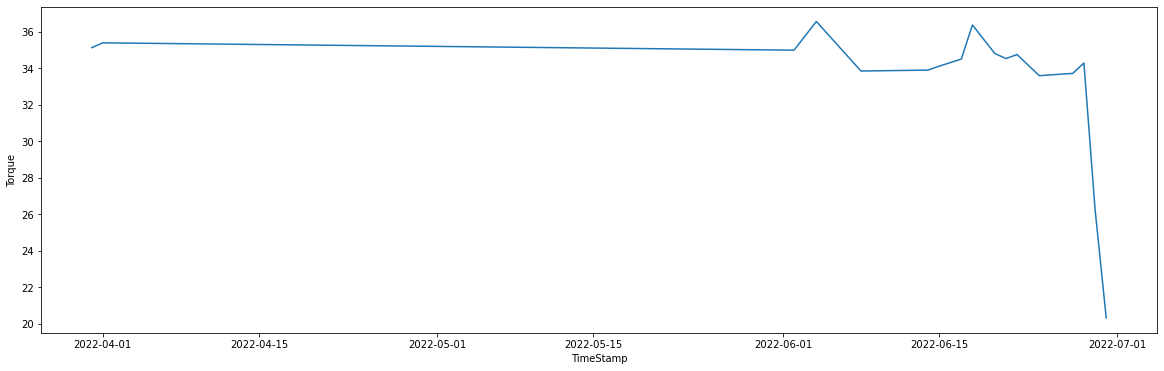

In [17]:
plt.figure(figsize = (20, 6));
sns.lineplot(data = stn310_grp, x = 'TimeStamp', y = 'Torque');

# <span style="color:yellow">**Create New Dataset (to train model)**</span>


In [18]:
stn310_grp = stn310_grp[['TimeStamp','Torque']].drop_duplicates()
stn310_grp

,TimeStamp,Torque
0,2022-03-31,35.126878
1,2022-04-01,35.392272
2,2022-06-02,34.990392
3,2022-06-04,36.562833
4,2022-06-08,33.849162
5,2022-06-14,33.898120
6,2022-06-15,34.110130
7,2022-06-17,34.504147
8,2022-06-18,36.370117
9,2022-06-20,34.814445


# <span style="color:yellow">**Train Autoregressive (AR) Model**</span>

### Checking for stationarity in the data and Order of AR model

If the p-value is lower than 0.05, the time series can be said to be stationary. The data must be stationary to fulfil one of the hypotheses of AR models. If the data doesn't pass this test, then the fit of the model to the data is not good and the results are not reliable.

Plot partial autocorrelation function (PACF) plot to assess the direct effect of past data on future data.

To determine the order of the AR model you select the number of points that have a high autocorrelation (y axis value), and this will determine how far back in time the model will go to use as information to predict a new value. The first data point corresponds to a lag of 0 (the data point itself), so it will always be one. 

Selecting an order of 1 to include the partial autocorrelation of ~0.8 into the model. The other autocorrelations seem too weak to be significant in the performance of the model.

In [19]:
dftest = adfuller(stn310_grp['Torque'], autolag = 'AIC')

print("1. ADF: ", dftest[0])
print("2. P-Value: ", dftest[1])
print("3. Num of lags: ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation: ", dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
    print("\t", key, ":", val)

1. ADF:  2.710498208945996
2. P-Value:  0.9990875010194994
3. Num of lags:  5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation:  11
5. Critical Values : 
	 1% : -4.223238279489106
	 5% : -3.189368925619835
	 10% : -2.729839421487603


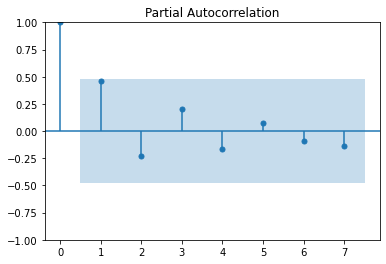

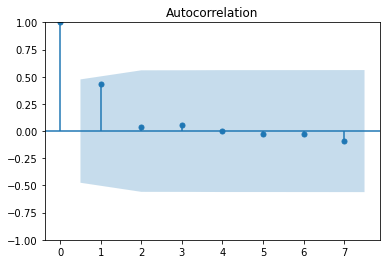

In [27]:
# Plot Partial autocorrelation plot
pacf = plot_pacf(stn310_grp['Torque'], lags = 7)

# Plot Autocorrelation plot
acf = plot_acf(stn310_grp['Torque'], lags = 7)

In [31]:
# Separate into train and test
stn310_train_data = stn310_grp.Torque[0:12]
stn310_test_data = stn310_grp[12:]

# Convert index to datetime index
stn310_train_data.index = pd.DatetimeIndex(stn310_grp.TimeStamp[0:12]).to_period('d')

### Train model

**Note:** The warning that the model prints is because the time series is not regular (the points are not spread at constant time intervals). This can cause problems because these type of models are not trained for this type of data. You could fix this by doing a resampling of the time series taking only regular intervals, but you would lose a lot information by doing this.

In [32]:
# Train model
ar_model = AutoReg(stn310_train_data, lags = 1).fit()

# Print results
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Torque   No. Observations:                   12
Model:                     AutoReg(1)   Log Likelihood                 -14.012
Method:               Conditional MLE   S.D. of innovations              0.865
Date:                Tue, 12 Jul 2022   AIC                             34.024
Time:                        16:20:49   BIC                             35.218
Sample:                    04-01-2022   HQIC                            33.272
                         - 06-22-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4738     10.516      3.278      0.001      13.863      55.085
Torque.L1      0.0119      0.301      0.039      0.969      -0.578       0.602
                                    Roots           

### Predict torque of the test set

Again, on this first general view of the predictions, it looks like a straight line, but as it can be seen in the plot below, it is not, but the drop in the torque values at the end of the month reduce the scale and makes the prediction look flat.

Even though the predictions are not a straight line, they are quite flat. This is because the model is still not finding strong underlying patterns in the data, so it's heavily relying on the average torque as before.

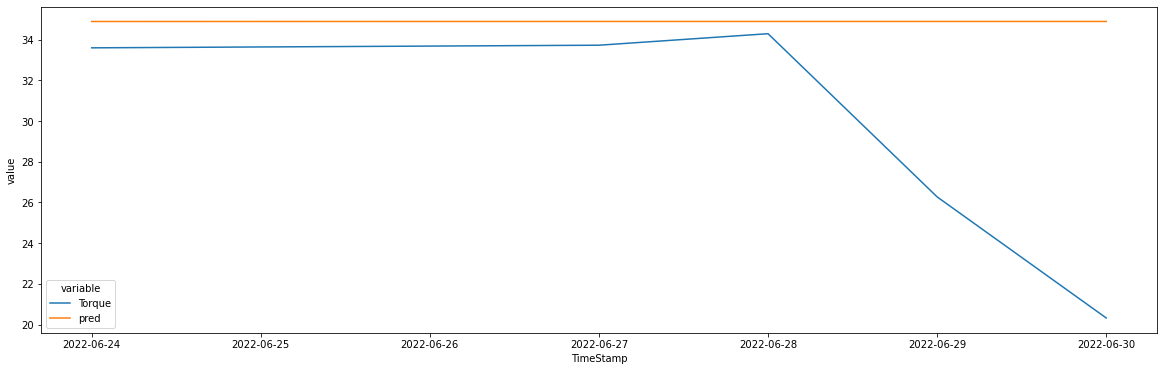

In [35]:
# Make predictions
pred = ar_model.predict(start = len(stn310_train_data), end = (len(stn310_grp)-1), dynamic = False)

# Make df with real and predicted values
Stn310_plot_data = stn310_test_data[['TimeStamp','Torque']]
Stn310_plot_data['pred'] = pred.to_numpy()
Stn310_plot_data = pd.melt(Stn310_plot_data, ['TimeStamp'])

# Plot predictions vs. real values
plt.figure(figsize = (20, 6));
sns.lineplot(data = Stn310_plot_data, x = 'TimeStamp', y = 'value', hue = 'variable');

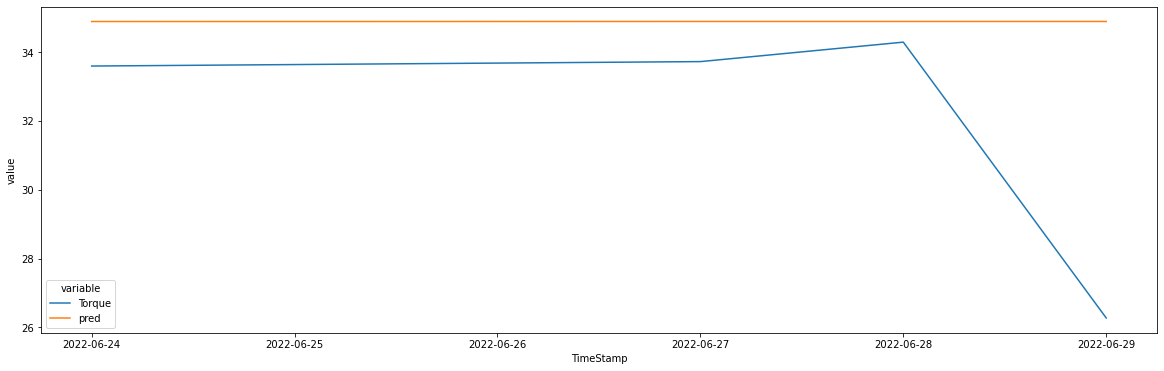

In [36]:
# Plot predictions vs. real values for the first days of predictions
plt.figure(figsize = (20, 6));
sns.lineplot(data = Stn310_plot_data.sort_values(by='TimeStamp')[:8], x = 'TimeStamp', y = 'value', hue = 'variable');

# <span style="color:yellow">**New plot**</span>

Plotting the beginning of the line with the real values and the end with the predicted ones

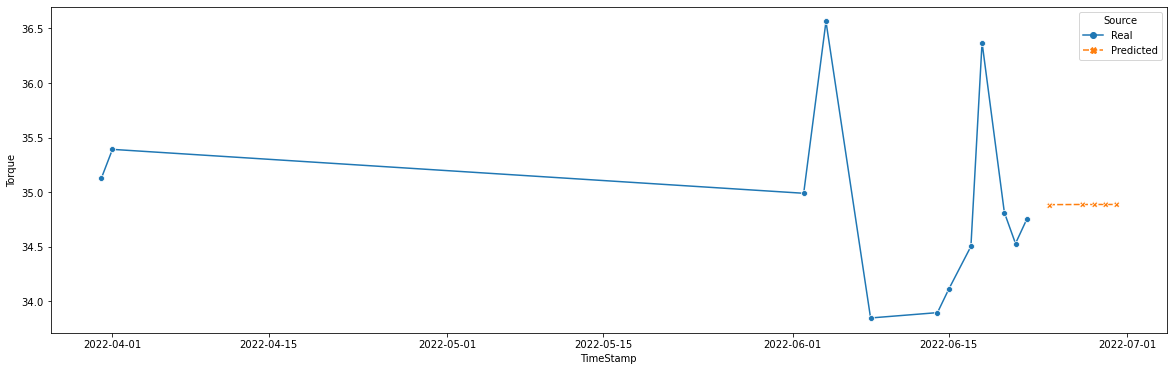

In [42]:
Stn310_plot_data = stn310_grp

# Remove the real values of the last 7 days and replace them with the predicted values
Stn310_plot_data.Torque[12:] = pred.to_numpy()

# Indicate if the value correspond to the real or the predicted torque
Stn310_plot_data['Source'] = 'Real'
Stn310_plot_data['Source'][12:] = 'Predicted'

# Add an extra point to join the two lines
new_row = pd.DataFrame(Stn310_plot_data.iloc[15]).transpose().iloc[:,:3]
new_row['Source'] = 'Predicted'
Stn310_plot_data = pd.concat([Stn310_plot_data, new_row], ignore_index = True)


# Plot predictions vs. real values as the image sent in the chat
plt.figure(figsize = (20, 6));
sns.lineplot(data = Stn310_plot_data, x = 'TimeStamp', y = 'Torque', hue = 'Source', style = 'Source', markers=True);

In [43]:
new_row.head()

,TimeStamp,Torque,Source
15,2022-06-29,34.888,Predicted


In [45]:
px.line(Stn310_plot_data, x="TimeStamp", y='Torque', color='Source', 
                 title="setting up colour palette")